In [1]:
# Necessary packages
import sys
sys.path.insert(0, '/home/giulia/Provenance')
#import ipynb.fs.full.provenance as pr
import ipynb.fs.full.provenance_lib as pr_lib
import pandas as pd
import numpy as np

from IPython.display import Image

# Specify where to save the processed files as savepath
savepath = 'results/ValueTransf_prov/'

In [2]:
# Files get loaded from fairCorrect github repository
url = 'https://raw.githubusercontent.com/vladoxNCL/fairCorrect/master/Datasets/'

# Get balancing feature to end column
df = pd.read_csv(url + 'adult.data', header=None)

# Assign names to columns
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
         'occupation', 'relationship', 'race', 'sex', 'capital-gain',
         'capital-loss', 'hours-per-week', 'native-country', 'label']

df.columns = names

# Select firt 3 rows 
df = df[:3]

df = df[['age', 'workclass', 'education']]

print(df)

# Create a new provenance document 
#p = pr.Provenance(df, savepath)
p = pr_lib.Provenance(df, savepath)


   age          workclass   education
0   39          State-gov   Bachelors
1   50   Self-emp-not-inc   Bachelors
2   38            Private     HS-grad


In [3]:
#VALUE TRANSFORMATION
# Replace ? character for NaN value
a = df['education'][0]
df = df.replace(a, np.nan)
print(df)

#GET PROVENANCE
d = p.get_prov_value_transformation(df,a)


   age          workclass education
0   39          State-gov       NaN
1   50   Self-emp-not-inc       NaN
2   38            Private   HS-grad
get_prov_value_transformation function took 2.131 ms


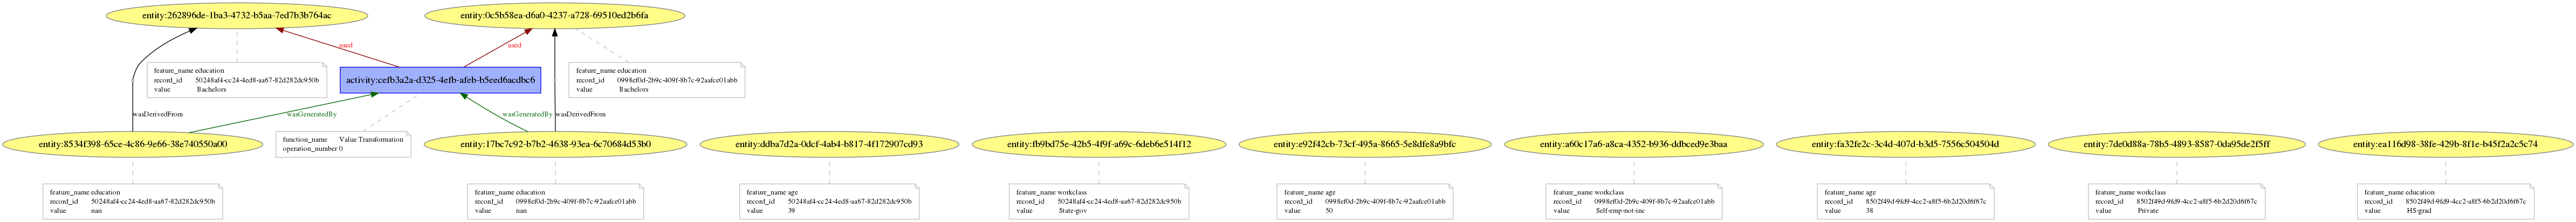

In [4]:
namefile = 'ValueTransf_prov'
p.save_all_graph(namefile)
Image(savepath + namefile + '.png')

In [5]:
#VALUE IMPUTATION
df.fillna(0)

#GET PROVENANCE
d = p.get_prov_imputation(df)

get_prov_imputation function took 10.442 ms


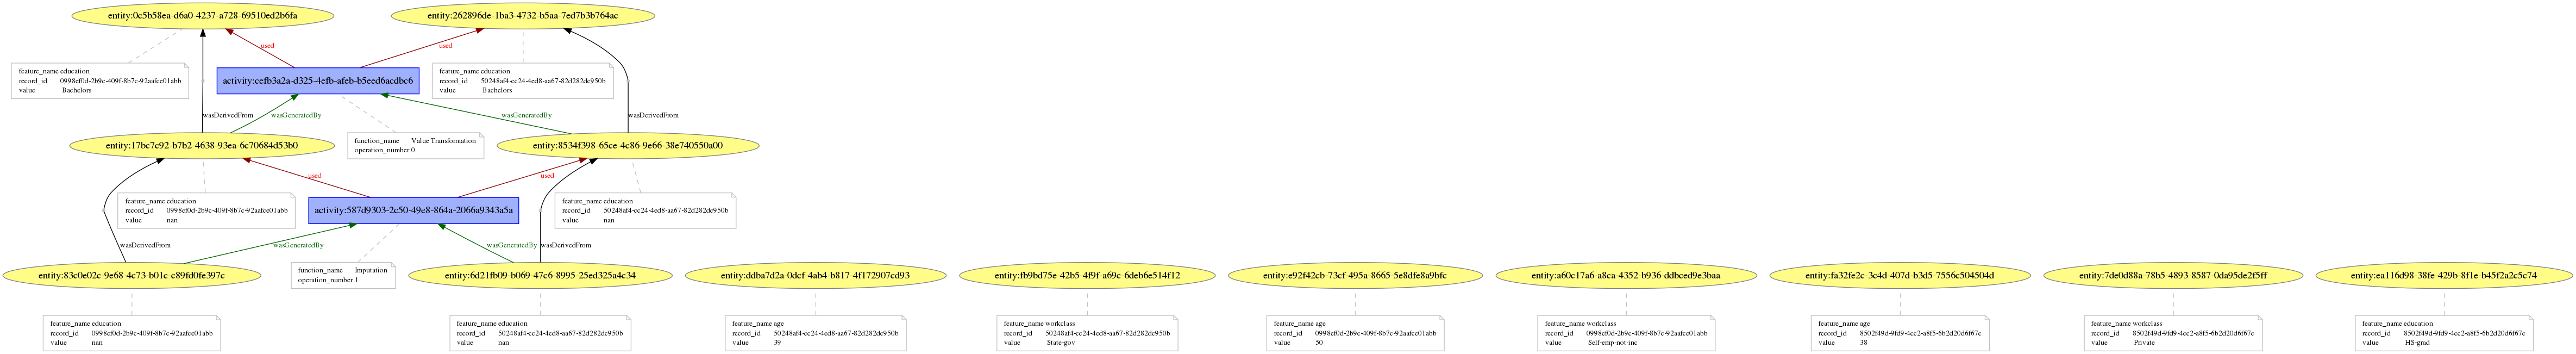

In [6]:
namefile = 'ValueImputation_prov'
p.save_all_graph(namefile)
Image(savepath + namefile + '.png')